In [ ]:
### Predict the sales of the retail store

### EDA Framework

## 1. Univariate analysis (single variable analysis)
# 1.1. for numerical variable we use - distplot(prefered),histogram,boxplot(used to identify the outliners of the data)
# 1.2.for categorical variable we use - countplot

## 2. Bivariate/Multivariate analysis - it is done wrt target variable
# 2.1. Num vs Num : Scatterplot
# 2.2. Cat vs Num : boxplot/violinplot and barplot
# 2.3. Cat vs Cat : pd.crosstab() to generate the frequency table and then countplot

## 3. Dealing with the missing values

## 4. Outliner analysis and removal
# (hint: we cannot remove outliners in financial data i.e, for sales,revenue,costs)

## 5. ** Feature Engineering**

## 6. Scaling and Transformation

## 7. Categorical encoding

# NOTE : Once the above mentioned steps are done, we split the data in train and test
(hint : target variable never has missing values)

In [2]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing charts
plt.rcParams['figure.figsize']=[15,6]

In [10]:
# Import the data

sales=pd.read_csv('~/Downloads/train_XnW6LSF.csv')
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [12]:
# Check the shape of the data :: Rows and Columns

sales.shape

(8523, 12)

In [13]:
# Check the type of the data :

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Univariate analysis

### numerical variable : distplot

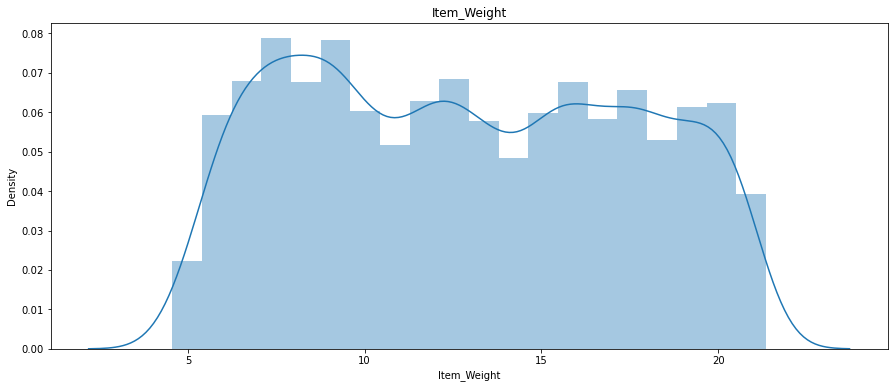

In [16]:
# Item weight

import warnings 
warnings.filterwarnings('ignore')

sns.distplot(sales.Item_Weight)
plt.title('Item_Weight')
plt.show()

# since the spread of the data is high, we can assume that the data is uniformly distributed.

Text(0.5, 1.0, 'Target')

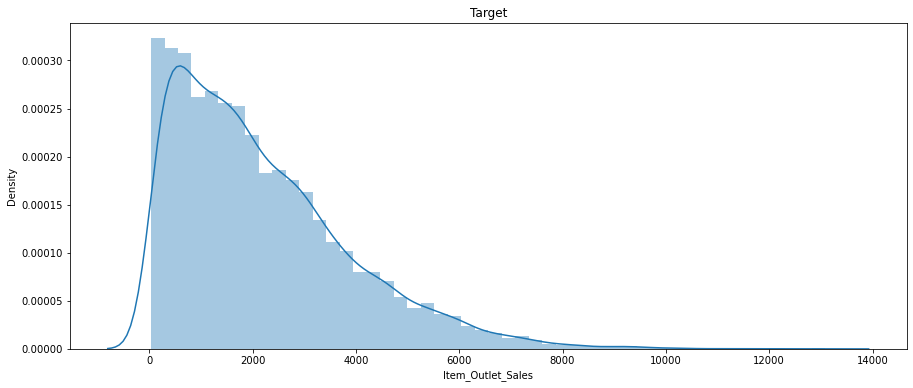

In [17]:
# target variable
sns.distplot(sales.Item_Outlet_Sales)
plt.title('Target')

# its right-skewed

In [18]:
# Statistical Summary of the data
sales.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [19]:
# Skewness
print('Skewness:',sales.Item_Outlet_Sales.skew())

Skewness: 1.1775306028542796


In [23]:
# Mode
print('Mode:',sales.Item_Outlet_Sales.mode()[0])

Mode: 958.752


### Skewness

* The skewness refers to the distortion in the shape of the data due to presence of outliners.

* If the data is +vely skewed,we will see the skewness value as +ve and vice-versa for -vely skewed data

* If the skewness is btw **0 to 0.5**, we say that the data is normal.

* However, If the range of skewness is btw **0.5 to 1**, we say that the data is moderately skewed.

* If skewness is **1 or more than 1**, it is perfectly skewed.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

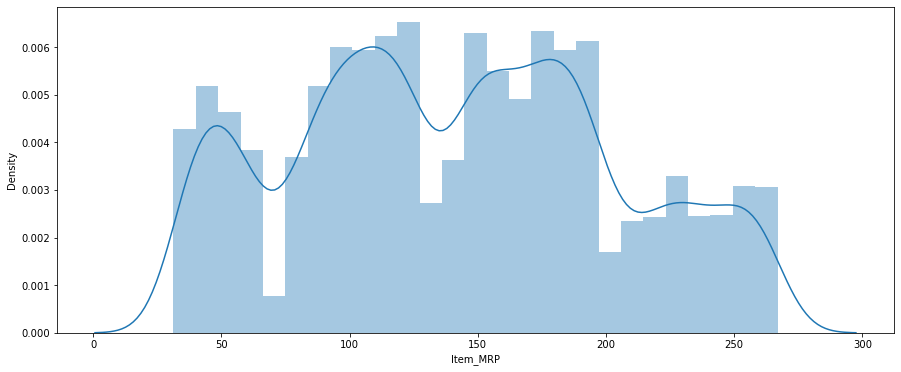

In [25]:
## Item MRP
sns.distplot(sales.Item_MRP)

# Item MRP shows 4 different frequencies and by looking at it ,It is clear that it is Multi-Modal data

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

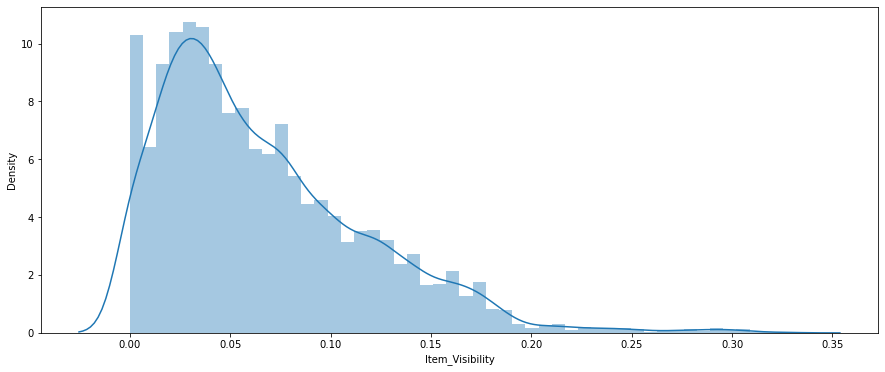

In [26]:
## Item Visibility
sns.distplot(sales.Item_Visibility)

In [30]:
# for numerical variables
sales.select_dtypes(include=np.number)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


## Univariate analysis
### Categorical variable : countplot

In [27]:
# Find out the list of categories....

sales.select_dtypes(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [31]:
sales.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

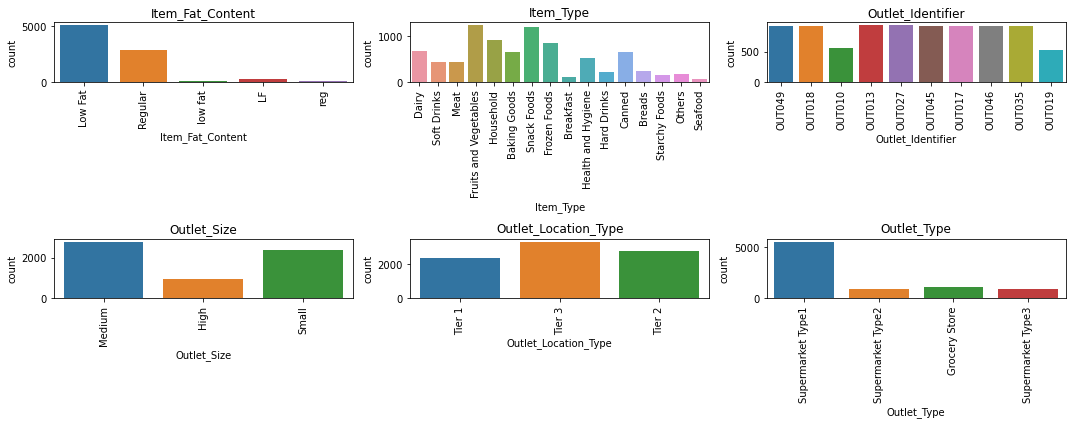

In [43]:
cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
rows = 2
columns = 3
iterator = 1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(sales.loc[:, i])
    plt.title(i)
    iterator+=1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Inferences

1. Most of the products that are sold are **Low Fat** items.
2. The top 5 item types are **Fruits and veggies, Dairy, Snack food, Household etc **.
3. Most of the outlets in the business are **Medium** size outlets.
4. The business has opened most of their outlets in **Tier 3 cities**.
5. The type of the outlet is **S1**. 